# Allstate Claims Severity (https://www.kaggle.com/c/allstate-claims-severity)

## Import Packages

In [1]:
%matplotlib inline

import re
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
from IPython.core.pylabtools import figsize

plt.style.use('ggplot')
figsize(15,8)
pd.set_option('display.max_columns', None)

## Reading Data

In [3]:
path = "data/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
sample = pd.read_csv(path+"sample_submission.csv")

## Exploratory Data Analysis

In [3]:
train.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
0,1,A,B,A,B,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,D,B,B,D,D,B,D,C,B,D,B,A,A,A,A,A,D,B,C,E,A,C,T,B,G,A,A,I,E,G,J,G,BU,BC,C,AS,S,A,O,LB,0.726300,0.245921,0.187583,0.789639,0.310061,0.718367,0.335060,0.30260,0.67135,0.83510,0.569745,0.594646,0.822493,0.714843,2213.18
1,2,A,B,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,A,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,L,F,A,A,E,E,I,K,K,BI,CQ,A,AV,BM,A,O,DP,0.330514,0.737068,0.592681,0.614134,0.885834,0.438917,0.436585,0.60087,0.35127,0.43919,0.338312,0.366307,0.611431,0.304496,1283.60
2,5,A,B,A,A,B,A,A,A,B,B,B,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,B,D,B,D,C,B,B,B,A,A,A,A,A,D,D,C,E,E,A,D,L,O,A,B,E,F,H,F,A,AB,DK,A,C,AF,A,I,GK,0.261841,0.358319,0.484196,0.236924,0.397069,0.289648,0.315545,0.27320,0.26076,0.32446,0.381398,0.373424,0.195709,0.774425,3005.09
3,10,B,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,D,B,B,D,D,D,B,C,B,D,B,A,A,A,A,A,D,D,C,E,E,D,T,I,D,A,A,E,E,I,K,K,BI,CS,C,N,AE,A,O,DJ,0.321594,0.555782,0.527991,0.373816,0.422268,0.440945,0.391128,0.31796,0.32128,0.44467,0.327915,0.321570,0.605077,0.602642,939.85
4,11,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,C,B,B,C,A,A,A,B,H,D,B,D,E,E,A,P,F,J,A,A,D,E,K,G,B,H,C,C,Y,BM,A,K,CK,0.273204,0.159990,0.527991,0.473202,0.704268,0.178193,0.247408,0.24564,0.22089,0.21230,0.204687,0.202213,0.246011,0.432606,2763.85


In [4]:
test.head()

,id,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14
0,4,A,B,A,A,A,A,A,A,B,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,D,B,A,A,A,A,A,D,C,C,E,C,D,T,H,G,A,A,G,E,I,L,K,BI,BC,A,J,AX,A,Q,HG,0.321594,0.299102,0.246911,0.402922,0.281143,0.466591,0.317681,0.61229,0.34365,0.38016,0.377724,0.369858,0.704052,0.392562
1,6,A,B,A,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,B,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,D,E,A,A,P,B,D,A,A,G,G,G,F,B,BI,CO,E,G,X,A,L,HK,0.634734,0.620805,0.654310,0.946616,0.836443,0.482425,0.443760,0.71330,0.51890,0.60401,0.689039,0.675759,0.453468,0.208045
2,9,A,B,A,B,B,A,B,A,B,B,A,B,B,B,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,D,B,B,B,B,B,D,C,B,B,B,A,B,A,A,A,D,D,C,E,E,A,D,G,Q,A,D,D,E,J,G,A,BI,CS,C,U,AE,A,K,CK,0.290813,0.737068,0.711159,0.412789,0.718531,0.212308,0.325779,0.29758,0.34365,0.30529,0.245410,0.241676,0.258586,0.297232
3,12,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,B,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,D,B,D,B,D,B,B,A,B,D,D,A,A,A,G,H,D,D,C,E,E,D,T,G,A,A,D,E,E,I,K,K,BI,CR,A,AY,AJ,A,P,DJ,0.268622,0.681761,0.592681,0.354893,0.397069,0.369930,0.342355,0.40028,0.33237,0.31480,0.348867,0.341872,0.592264,0.555955
4,15,B,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,B,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,B,D,E,A,A,P,A,A,A,A,F,E,G,E,B,AB,EG,A,E,I,C,J,HA,0.553846,0.299102,0.263570,0.696873,0.302678,0.398862,0.391833,0.23688,0.43731,0.50556,0.359572,0.352251,0.301535,0.825823


In [5]:
print (train.shape)
print (test.shape)

(188318, 132)
(125546, 131)


In [6]:
print ((train.isnull().sum() == 0).value_counts())
print ((test.isnull().sum() == 0).value_counts())

True    132
dtype: int64
True    131
dtype: int64


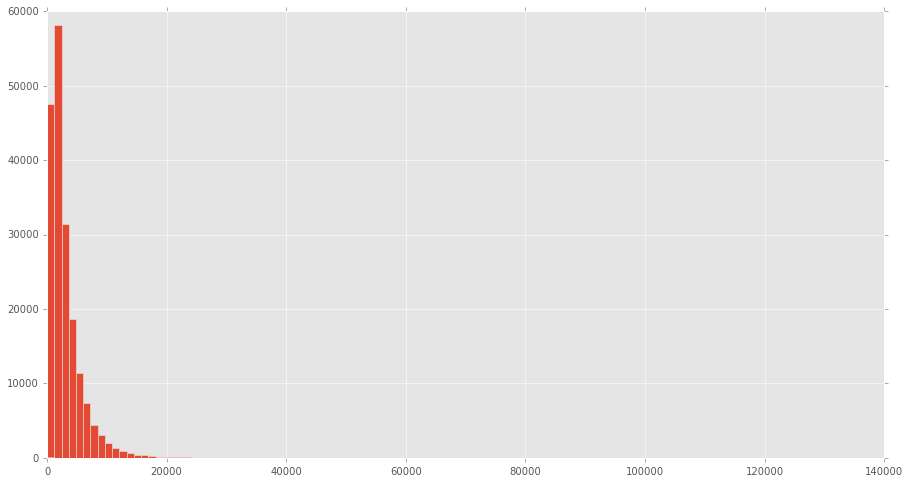

In [4]:
train['loss'].hist(bins = 100)

In [5]:
train['log_loss'] = np.log(train['loss'])

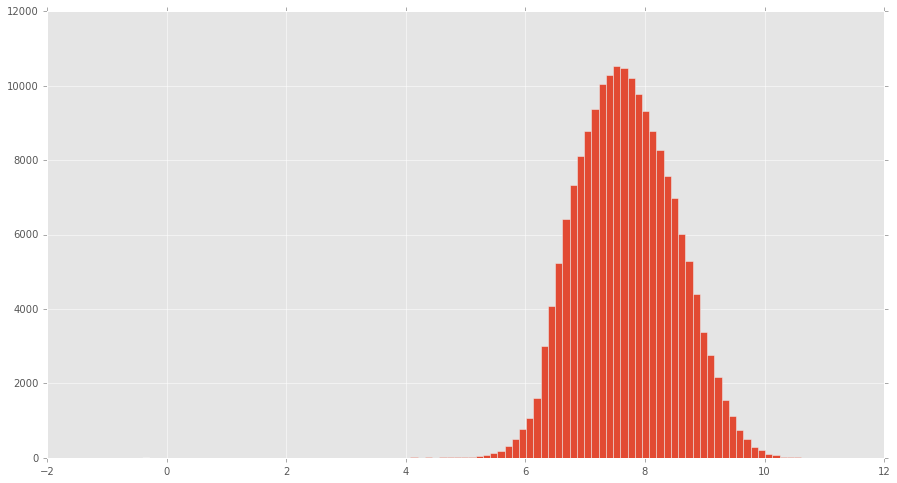

In [6]:
train['log_loss'].hist(bins = 100)

In [9]:
train.drop('log_loss', axis = 1, inplace = True)

## Checking if categorical variables match in training and test set

In [9]:
columns = []
for column in train.columns.values:
    if train[column].dtypes == 'object':
        if sorted(train[column].unique()) != sorted(test[column].unique()):
            columns.append(column)

if columns == []:
    print "Categorical variables match in train and test sets."
else:
    print columns

['cat89', 'cat90', 'cat92', 'cat96', 'cat99', 'cat101', 'cat102', 'cat103', 'cat105', 'cat106', 'cat109', 'cat110', 'cat111', 'cat113', 'cat114', 'cat116']


In [89]:
train.describe()

,id,cont1,cont2,cont3,cont4,cont5,cont6,cont7,cont8,cont9,cont10,cont11,cont12,cont13,cont14,loss
count,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000,188318.000000
mean,294135.982561,0.493861,0.507188,0.498918,0.491812,0.487428,0.490945,0.484970,0.486437,0.485506,0.498066,0.493511,0.493150,0.493138,0.495717,3037.337686
std,169336.084867,0.187640,0.207202,0.202105,0.211292,0.209027,0.205273,0.178450,0.199370,0.181660,0.185877,0.209737,0.209427,0.212777,0.222488,2904.086186
min,1.000000,0.000016,0.001149,0.002634,0.176921,0.281143,0.012683,0.069503,0.236880,0.000080,0.000000,0.035321,0.036232,0.000228,0.179722,0.670000
25%,147748.250000,0.346090,0.358319,0.336963,0.327354,0.281143,0.336105,0.350175,0.312800,0.358970,0.364580,0.310961,0.311661,0.315758,0.294610,1204.460000
50%,294539.500000,0.475784,0.555782,0.527991,0.452887,0.422268,0.440945,0.438285,0.441060,0.441450,0.461190,0.457203,0.462286,0.363547,0.407403,2115.570000
75%,440680.500000,0.623912,0.681761,0.634224,0.652072,0.643315,0.655021,0.591045,0.623580,0.566820,0.614590,0.678924,0.675759,0.689974,0.724623,3864.045000
max,587633.000000,0.984975,0.862654,0.944251,0.954297,0.983674,0.997162,1.000000,0.980200,0.995400,0.994980,0.998742,0.998484,0.988494,0.844848,121012.250000


In [90]:
train.describe(include = ['O'])

,cat1,cat2,cat3,cat4,cat5,cat6,cat7,cat8,cat9,cat10,cat11,cat12,cat13,cat14,cat15,cat16,cat17,cat18,cat19,cat20,cat21,cat22,cat23,cat24,cat25,cat26,cat27,cat28,cat29,cat30,cat31,cat32,cat33,cat34,cat35,cat36,cat37,cat38,cat39,cat40,cat41,cat42,cat43,cat44,cat45,cat46,cat47,cat48,cat49,cat50,cat51,cat52,cat53,cat54,cat55,cat56,cat57,cat58,cat59,cat60,cat61,cat62,cat63,cat64,cat65,cat66,cat67,cat68,cat69,cat70,cat71,cat72,cat73,cat74,cat75,cat76,cat77,cat78,cat79,cat80,cat81,cat82,cat83,cat84,cat85,cat86,cat87,cat88,cat89,cat90,cat91,cat92,cat93,cat94,cat95,cat96,cat97,cat98,cat99,cat100,cat101,cat102,cat103,cat104,cat105,cat106,cat107,cat108,cat109,cat110,cat111,cat112,cat113,cat114,cat115,cat116
count,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318,188318
unique,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,3,3,3,3,4,4,4,4,4,4,4,4,4,4,4,4,8,7,8,7,5,7,5,8,7,5,16,15,19,9,13,17,20,17,20,11,84,131,16,51,61,19,23,326
top,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,A,D,B,B,D,D,B,B,C,B,B,B,A,A,A,A,A,D,D,C,E,C,A,P,F,A,A,A,E,E,G,F,B,BI,CL,A,E,BM,A,K,HK
freq,141550,106721,177993,128395,123737,131693,183744,177274,113122,160213,168186,159825,168851,186041,188284,181843,187009,187331,186510,188114,187905,188275,157445,181977,169969,177119,168250,180938,184593,184760,182980,187107,187361,187734,188105,156313,165729,169323,183393,180119,181177,186623,184110,172716,183991,187436,187617,188049,179127,137611,187071,179505,172949,183762,188173,188136,185296,188079,188018,187872,187596,188273,188239,188271,186056,179982,187626,188176,188011,188295,178646,118322,154275,184731,154307,181347,187503,186526,152929,137505,154385,147536,141534,154939,186005,103852,166992,168926,183744,177993,111028,124689,150237,121642,87531,174360,78127,105492,79455,42970,106721,177274,123737,42925,76493,47165,47310,65512,152918,25305,128395,25148,26191,131693,43866,21061


## Data Cleaning

In [ ]:
train['cat102'].replace('J','I',inplace = True)

## Functions

In [11]:
def select_columns(df,n,sign):
    select_cols = []
    for column in df.columns.values:
        if df[column].dtypes == 'object':
            if sign == "greater":
                if len(df[column].unique()) >= n :
                    select_cols.append(column)
            elif sign ==  "lesser":
                if len(df[column].unique()) <= n :
                    select_cols.append(column)
            elif sign == "equal":
                if len(df[column].unique()) == n :
                    select_cols.append(column)
    return select_cols

def get_unique_letters(df):
    letters = []
    for col in df.columns.values:
        try :
            letter = col.split("_")[1]
            letters.append(letter)
        except:
            continue
        letters = list(set(letters))
    return letters


def count_total_letters(df):
    letters = get_unique_letters(df)
    for letter in letters:
        cols = filter(lambda x : "_{0}".format(letter) in x, df.columns.values)
        df['count_{0}'.format(letter)] = df[cols].sum(axis = 1)
    return df

def count_same_level_letters(df,cols,level_length):
    rel_cols = []
    for col in cols:
        rel_cols = rel_cols + filter(lambda x : "{0}_".format(col) in x, df.columns.values)
    letters = get_unique_letters(df[rel_cols])
    for letter in letters:
        cols = filter(lambda x : "_{0}".format(letter) in x, rel_cols)
        df['count_{0}_{1}'.format(level_length,letter)] = df[cols].sum(axis = 1)
    return df 

def numerical_features(df,cols):
    df['cont_mean'] = df[cols].mean(axis = 1)
    df['cont_std'] = df[cols].std(axis = 1)
    df['cont_sum'] = df[cols].sum(axis = 1)
    df['cont_max'] = df[cols].max(axis = 1)
    df['cont_min'] = df[cols].min(axis = 1) 
    df['cont_25%'] = df[cols].quantile(q = 0.25, axis = 1)
    df['cont_50%'] = df[cols].quantile(q = 0.50, axis = 1)
    df['cont_75%'] = df[cols].quantile(q = 0.75, axis = 1)
    df['cont_IQR'] = df['cont_75%'] - df['cont_25%']
    df['cont_skew'] = skew(df[cols].values, axis = 1)
    df['cont_kurt'] = kurtosis(df[cols].values, axis = 1)
    df['outliers'] = df.apply(lambda row : len([element for element in cols if (row[element] > row['cont_75%'] + 1.5*row['cont_IQR']) \
                                                                             | (row[element] < row['cont_25%'] - 1.5*row['cont_IQR'])]),axis = 1) 
    for i in range(0,len(cols)):
        df['cont_slope_%s' % str(i+1)] = df.apply(lambda row : linregress(np.arange(len(cols)) + 1,row[cols]).slope, axis = 1)
        cols = cols[1:] + [cols[0]]
    return df

def get_top_levels(df,col,n):
    counts = pd.DataFrame(train[col].value_counts()).head(n)
    top_levels = list(counts.index)
    return top_levels
    
def group_levels(df,col,top_levels):
    df.loc[~df[col].isin(top_levels),col] = 'X'
    return df

In [12]:
cols_greater_26 = select_columns(train,26,'greater')
for col in cols_greater_26:
    top_levels = get_top_levels(train,col,25)
    train = group_levels(train,col,top_levels)
    test = group_levels(test,col,top_levels)

## Converting categorical features to dummies

In [13]:
from sklearn.preprocessing import LabelEncoder
target = 'loss'
continous_feat_train = [col for col in train.columns.values if ((train[col].dtype == 'int64') or  (train[col].dtype == 'float64')) and ((col != 'loss') and (col != 'id'))]
categorical_feat_train = [col for col in train.columns.values if train[col].dtype == "object"]
continous_feat_test = [col for col in test.columns.values if ((test[col].dtype == 'int64') or  (test[col].dtype == 'float64')) and ((col != 'loss') and (col != 'id'))]
categorical_feat_test = [col for col in test.columns.values if test[col].dtype == "object"]

In [14]:
X_train = pd.concat([pd.get_dummies(train[categorical_feat_train]), train[continous_feat_train]], axis = 1)
X_test = pd.concat([pd.get_dummies(test[categorical_feat_test]), test[continous_feat_test]], axis = 1)
y_train = train[target]

## Feature Creation

In [15]:
X_train = count_total_letters(X_train)
X_test = count_total_letters(X_test)
for i in range(2,6):
    X_train = count_same_level_letters(X_train,select_columns(train,i,'equal'),i)
    X_test = count_same_level_letters(X_test,select_columns(test,i,'equal'),i)

cols_7_train = select_columns(train,7,'equal')
cols_7_test = select_columns(test,7,'equal')
cols_7_train.remove('cat92')
cols_7_test.append('cat90')
cols_7_test.remove('cat102')
X_train = count_same_level_letters(X_train,cols_7_train,7)
X_test = count_same_level_letters(X_test,cols_7_test,7)

cols_9_train = select_columns(train,9,'equal')
cols_9_test = select_columns(test,9,'equal')
cols_9_train = cols_9_train + ['cat_89','cat92','cat96']
cols_9_test = cols_9_test + ['cat89','cat92','cat102']

X_train = count_same_level_letters(X_train,cols_9_train,9)
X_test = count_same_level_letters(X_test,cols_9_test,9)

X_train = numerical_features(X_train,continous_feat_train)
X_test = numerical_features(X_test,continous_feat_test)

In [18]:
print X_train.shape
print X_test.shape

(188318, 766)
(125546, 763)


## Saving Files

In [2]:
X_train.to_csv(path+'mtrain_v1.csv',index = False)
X_test.to_csv(path+'mtest_v1.csv', index = False)
path = "data/"
train = pd.read_csv(path+"train.csv")
test = pd.read_csv(path+"test.csv")
y_train = train['loss']
X_train = pd.read_csv(path+'mtrain_v2.csv')
X_test = pd.read_csv(path+'mtest_v2.csv')

In [3]:
final_cols = list(set(X_train.columns.values).intersection(X_test.columns.values))
X_train_m = X_train[final_cols]
X_test_m = X_test[final_cols]

In [4]:
print X_train_m.shape
print X_test_m.shape

(188318, 757)
(125546, 757)


## Modeling

### Random Forest

In [41]:
from sklearn.ensemble import RandomForestRegressor

In [5]:
from sklearn.cross_validation import KFold, cross_val_score
import xgboost as xgb

C:\Users\R51468\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [43]:
clf = RandomForestRegressor(n_estimators = 5000, n_jobs = 10)

In [11]:
clf.fit(X_train_m,np.log(y_train))

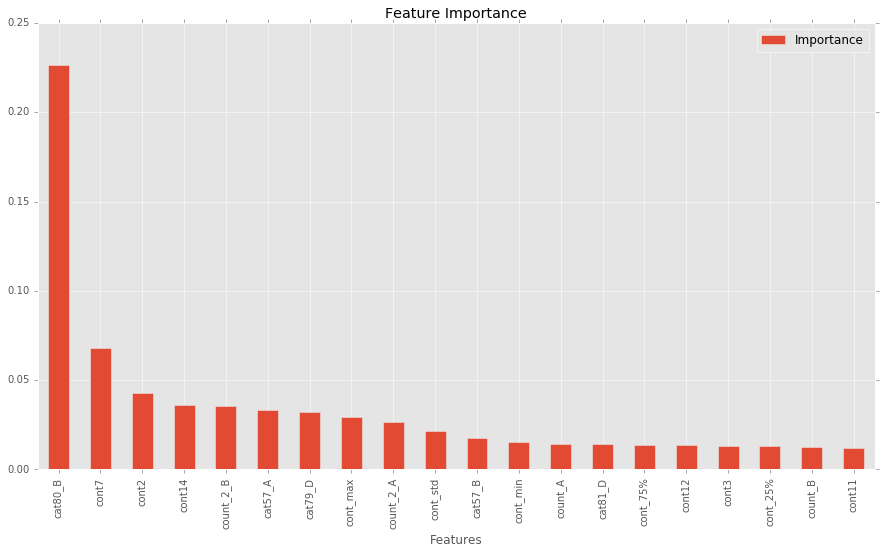

In [76]:
features = X_train_m.columns.values
pd.DataFrame({'Features':features,'Importance':clf.feature_importances_}).sort_values(
by = 'Importance',ascending = False).head(20).set_index("Features").plot(kind = "bar")
plt.title("Feature Importance")

In [29]:
feat_imp = pd.DataFrame({'Features':features,'Importance':clf.feature_importances_}).sort_values(
by = 'Importance',ascending = False).set_index("Features")

In [78]:
y = clf.predict(X_test_m)

### XGBoost

In [8]:
import xgboost as xgb
gbm = xgb.XGBRegressor(nthreads = 10)

In [6]:
from sklearn.grid_search import GridSearchCV

C:\Users\R51468\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\R51468\AppData\Local\Continuum\Anaconda2\lib\site-packages\sklearn\grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [9]:
cv = GridSearchCV(gbm,
                  param_grid = {'learning_rate' : [0.01,0.1,1],
                                 'max_depth' : [1,5,10],
                                 'reg_lambda' : [0.1,0.01,1],
                                 'n_estimators' : [500,1000]},
                  scoring = 'mean_absolute_error',
                  verbose = 1,
                  n_jobs = 2)

In [12]:
cv.fit(X_train_m,np.log(y_train))

In [ ]:
cv.best_params_, cv.best_score_

In [13]:
gbm = cv.best_estimator_

In [14]:
y = gbm.predict(X_test_m)

In [17]:
y = np.exp(y)
print y

[ 1322.37023926  2176.2956543   8567.5859375  ...,  2852.97509766
  1308.05273438  3097.59008789]


In [15]:
from xgboost import plot_importance
plot_importance(gbm)

In [18]:
submission = pd.DataFrame({'id':test['id'],'loss':y})

In [19]:
submission

,id,loss
0,4,1322.370239
1,6,2176.295654
2,9,8567.585938
3,12,6276.524414
4,15,809.588074
5,17,2276.888428
6,21,2502.028809
7,28,907.012146
8,32,1974.013184
9,43,3009.993408


In [20]:
submission.to_csv("submission_30.csv",index = False)

## Random

In [ ]:
feat_imp = pd.DataFrame({'Features':features,'Importance':clf.feature_importances_}).sort_values(
by = 'Importance',ascending = False).set_index("Features")
feat_imp.reset_index(inplace = True)
feat_imp.to_csv("importance_rf5000.csv", index  = False)
feat_imp = pd.read_csv("importance_rf5000_transform.csv")
feat_imp_filter = feat_imp[feat_imp['Importance'] >= 0.001]
imp_cols = feat_imp_filter['Features'].values
X_train_m = X_train[imp_cols]
X_test_m = X_test[imp_cols]

In [ ]:
from sklearn.manifold import TSNE
X = train[continous_feat_train].ix[1:1000].values
model = TSNE(n_components=2, random_state=0)
y = model.fit_transform(X)
plt.scatter(y[:,0], y[:,1])

In [ ]:
sample = train.head(5)
for index, row in sample[cols_2].iterrows():
    print row.value_counts()['B']

In [ ]:
def count_across_columns(df,cols,value):
    count = []
    df = df[cols]
    for index, row in df.iterrows():
        try:
            value_num = row.value_counts()[value]
        except:
            value_num = 0
        count.append(value_num)
    return count

def feature_across_columns(df,levels):
    cols = select_columns(df,levels,'equal')
    values = df[cols[0]].unique()
    df['num_{0}_{1}'.format(levels,values[-1])] = len(cols)
    for i in range(len(values)-1):
        print i, values[i]
        df['num_{0}_{1}'.format(levels,values[i])] = count_across_columns(df,cols,values[i])
        df['num_{0}_{1}'.format(levels,values[-1])] = df['num_{0}_{1}'.format(levels,values[-1])] - df['num_{0}_{1}'.format(levels,values[i])]
    
    return cols, df

In [ ]:
dic = {}
for i in range(7,9):
    dic['cols_{0}'.format(i)], train = feature_across_columns(train,i)
    dic['cols_{0}'.format(i)], test = feature_across_columns(test,i)

In [ ]:
dict = {}
for column in columns :
    print column
    train_vc = list(pd.DataFrame(train[column].value_counts()).index)
    test_vc = list(pd.DataFrame(test[column].value_counts()).index)
    dict[column] = {'train':[x for x in train_vc if x not in test_vc],'test':[x for x in test_vc if x not in train_vc]}
    print train_vc
    print test_vc

print dict

In [ ]:
for key,value in dict.iteritems():
    levels = len(train[key].value_counts().unique())
    for element in value['test']:
        X_test.drop('{0}_{1}'.format(key,element),axis = 1, inplace = True)
        print '{0}_{1}'.format(key,element)
        try:
            X_test.drop('num_{0}_{1}'.format(levels,element),axis = 1, inplace = True)
            print 'num_{0}_{1}'.format(levels,element)
        except:
            continue
    for element in value['train']:
        X_train.drop('{0}_{1}'.format(key,element),axis = 1, inplace = True)
        print 'num_{0}_{1}'.format(levels,element)
        try:
            X_train.drop('num_{0}_{1}'.format(levels,element),axis = 1, inplace = True)
            print 'num_{0}_{1}'.format(levels,element)
        except:
            continue   